In [45]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with the actual file path or URL
file_path = 'data\Characteristics of Retirees.xlsx'

# Read the Excel file into a DataFrame and skip the first row
retirement_characteristics = pd.read_excel(file_path)

columns_to_keep = [0, 1, 2, 3, 4, 5, 8, 11, 14, 17, 20, 23]
new_header = ["Year", "Population of Interest", "Sex", "Classification", "Category", "Retired Age 54 & Under (people in thousands)", "Retired Age 55-59 (people in thousands)", "Retired Age 60-64 (people in thousands)", "Retired Age 65-69 (people in thousands)", "Retired Age 70 & Over (people in thousands)", "Total Retirees (thousands)", "Years"]

# Use iloc to select only the specified columns and assign the new header
retirement_characteristics = retirement_characteristics.iloc[:, columns_to_keep]
retirement_characteristics.columns = new_header

raw_data = pd.DataFrame(retirement_characteristics)

# Display the resulting DataFrame

raw_data.head()

,Year,Population of Interest,Sex,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
0,2014-15,People aged 45 years and over,Persons,Age group,45 – 49 years,113.230,0.000,0.000,0.000,0.0,113.230,37.041
1,2014-15,People aged 45 years and over,Persons,Age group,50 – 54 years,167.085,0.000,0.000,0.000,0.0,167.085,42.511
2,2014-15,People aged 45 years and over,Persons,Age group,55 – 59 years,192.581,64.135,0.000,0.000,0.0,256.716,47.377
3,2014-15,People aged 45 years and over,Persons,Age group,60 – 64 years,195.010,152.094,96.353,0.000,0.0,443.457,52.206
4,2014-15,People aged 45 years and over,Persons,Age group,65 – 69 years,207.810,168.924,212.248,132.877,0.0,721.859,56.574


In [46]:
#Take out the rows containing the totals to prevent compromising the data
tidied_retirement_df = []

for index, row in raw_data.iterrows():
    if row['Category'] != 'TOTAL':
        tidied_retirement_df.append(row)

tidied_retirement_df = pd.DataFrame(tidied_retirement_df)
tidied_retirement_df.head(10)

,Year,Population of Interest,Sex,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
0,2014-15,People aged 45 years and over,Persons,Age group,45 – 49 years,113.230,0.000,0.000,0.000,0.000,113.230,37.041
1,2014-15,People aged 45 years and over,Persons,Age group,50 – 54 years,167.085,0.000,0.000,0.000,0.000,167.085,42.511
2,2014-15,People aged 45 years and over,Persons,Age group,55 – 59 years,192.581,64.135,0.000,0.000,0.000,256.716,47.377
3,2014-15,People aged 45 years and over,Persons,Age group,60 – 64 years,195.010,152.094,96.353,0.000,0.000,443.457,52.206
4,2014-15,People aged 45 years and over,Persons,Age group,65 – 69 years,207.810,168.924,212.248,132.877,0.000,721.859,56.574
5,2014-15,People aged 45 years and over,Persons,Age group,70 years and over,480.844,345.741,430.158,277.614,176.255,1710.612,57.157
6,2014-15,People aged 45 years and over,Persons,State or Territory,New South Wales,424.758,237.721,276.070,142.781,61.621,1142.952,55.259
7,2014-15,People aged 45 years and over,Persons,State or Territory,Victoria,331.770,167.466,177.128,90.461,48.051,814.876,54.009
8,2014-15,People aged 45 years and over,Persons,State or Territory,Queensland,286.462,162.983,125.334,80.785,36.093,691.657,53.217
9,2014-15,People aged 45 years and over,Persons,State or Territory,South Australia,128.009,67.880,58.434,37.517,6.704,298.542,53.352


In [47]:
#List the categories for future reference
categories = raw_data['Category'].unique()
classification = raw_data['Classification'].unique()
pop_interest = raw_data['Population of Interest'].unique()
year = raw_data['Year'].unique()

categories = list(categories)
classification = list(classification)
pop_interest = list(pop_interest)
year = list(year)


In [48]:
#Print list of classification to identify possible ways to group data
classification

['Age group',
 'State or Territory',
 'Relationship in household',
 'Elapsed years since arrival',
 'Duration since retirement',
 'Self-assessed health status',
 'Weekly personal income from all sources',
 "Partner's weekly income from all sources",
 'Weekly household income from all sources',
 'TOTAL',
 nan]

In [49]:
#Print list of categories to identify possible ways present data
categories

['45 – 49 years',
 '50 – 54 years',
 '55 – 59 years',
 '60 – 64 years',
 '65 – 69 years',
 '70 years and over',
 'New South Wales',
 'Victoria',
 'Queensland',
 'South Australia',
 'Western Australia',
 'Tasmania',
 'Northern Territory',
 'Australian Capital Territory',
 'Family member',
 '   Husband, wife or partner',
 '      With dependants',
 '      Without dependants',
 '   Lone parent',
 '   Non-dependent child',
 '   Other relative',
 'Not in a family',
 '   Person living alone',
 '   Person living with non-relatives',
 'Born in Australia',
 'Born overseas',
 '   Arrived less than 10 years ago',
 '   Arrived 10 - 19 years ago',
 '   Arrived 20 - 29 years ago',
 '   Arrived 30 - 39 years ago',
 '   Arrived 40 - 49 years ago',
 '   Arrived 50 or more years ago',
 'Retired less than 5 years ago',
 'Retired 5 - 9 years ago',
 'Retired 10 - 14 years ago',
 'Retired 15 - 19 years ago',
 'Retired 20 - 24 years ago',
 'Retired 25 or more years ago',
 'Excellent',
 'Very good',
 'Good',
 

In [50]:
#Remove gender specific data as 'Persons' is the total of 'Male' & 'Female' data
generalised_df = []

for index, row in tidied_retirement_df.iterrows():
    if row['Sex'] == 'Persons':
        generalised_df.append(row)

generalised_df = pd.DataFrame(generalised_df)

#Remove 'Sex' column as it is no longer necessary
generalised_df = generalised_df.drop(['Sex'], axis=1)
generalised_df

,Year,Population of Interest,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
0,2014-15,People aged 45 years and over,Age group,45 – 49 years,113.230,0.000,0.000,0.000,0.000,113.230,37.041
1,2014-15,People aged 45 years and over,Age group,50 – 54 years,167.085,0.000,0.000,0.000,0.000,167.085,42.511
2,2014-15,People aged 45 years and over,Age group,55 – 59 years,192.581,64.135,0.000,0.000,0.000,256.716,47.377
3,2014-15,People aged 45 years and over,Age group,60 – 64 years,195.010,152.094,96.353,0.000,0.000,443.457,52.206
4,2014-15,People aged 45 years and over,Age group,65 – 69 years,207.810,168.924,212.248,132.877,0.000,721.859,56.574
...,...,...,...,...,...,...,...,...,...,...,...
27202,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,000 - $1,250",12.456,14.307,11.149,8.919,5.534,52.365,58.810
27203,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,250 - $1,500",2.454,6.193,5.888,8.090,0.000,22.624,60.462
27204,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,500 - $2,000",7.665,7.941,14.395,0.733,2.539,33.273,58.071
27205,2020-21,People without a long-term health condition,Weekly household income from all sources,"$2,000 or more",38.573,13.714,10.310,7.654,0.000,70.251,52.732


INDEPENDANT INCOME:
Group the age of retirement data based on their incomes

In [122]:
household_income = []

for index, row in generalised_df.iterrows():
    if row['Classification'] == 'Weekly household income from all sources':
        household_income.append(row)

household_income = pd.DataFrame(household_income)
household_income

,Year,Population of Interest,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
64,2014-15,People aged 45 years and over,Weekly household income from all sources,No income (or negative income),14.065,9.569,8.819,7.734,2.024,42.212,54.845
65,2014-15,People aged 45 years and over,Weekly household income from all sources,$1 - $200,8.927,5.719,3.494,3.501,1.822,23.463,56.833
66,2014-15,People aged 45 years and over,Weekly household income from all sources,$200 - $400,115.986,37.366,60.330,35.534,12.799,262.016,53.466
67,2014-15,People aged 45 years and over,Weekly household income from all sources,$400 - $600,296.244,116.081,136.364,82.278,41.685,672.652,53.656
68,2014-15,People aged 45 years and over,Weekly household income from all sources,$600 - $800,239.488,152.052,148.917,84.045,24.848,649.351,54.479
...,...,...,...,...,...,...,...,...,...,...,...
27202,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,000 - $1,250",12.456,14.307,11.149,8.919,5.534,52.365,58.810
27203,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,250 - $1,500",2.454,6.193,5.888,8.090,0.000,22.624,60.462
27204,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,500 - $2,000",7.665,7.941,14.395,0.733,2.539,33.273,58.071
27205,2020-21,People without a long-term health condition,Weekly household income from all sources,"$2,000 or more",38.573,13.714,10.310,7.654,0.000,70.251,52.732


In [180]:
age_compare = [4,5,6,7,8]

income_categories = [
 '$1 - $200',
 '$200 - $400',
 '$400 - $600',
 '$600 - $800',
 '$800 - $1,000',
 '$1,000 - $1,250',
 '$1,250 - $1,500',
 '$1,500 - $2,000',
 '$2,000 or more',
]

grouped_income = household_income.iloc[:, [3] + age_compare].groupby('Category', as_index=False).mean()
grouped_income = grouped_income.groupby('Category', as_index=False)[['Retired Age 54 & Under (people in thousands)', 'Retired Age 55-59 (people in thousands)',	'Retired Age 60-64 (people in thousands)',	'Retired Age 65-69 (people in thousands)',	'Retired Age 70 & Over (people in thousands)']].median()
grouped_income = grouped_income.sort_index(ascending=True, key=lambda x: pd.Categorical(x, categories=income_categories, ordered=True))

tidied_income = []
for index, row in grouped_income.iterrows():
    if row['Category'] != 'Not stated':
        tidied_income.append(row)

grouped_income = pd.DataFrame(tidied_income)
grouped_income = grouped_income.sort_values(by='Category', key=lambda x: pd.Categorical(x, categories=income_categories, ordered=True))
grouped_income

,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands)
0,$1 - $200,3.225483,1.258433,2.762092,1.855317,1.152417
5,$200 - $400,23.437225,10.929167,14.646933,10.121175,3.521625
6,$400 - $600,81.231142,36.368658,47.992983,35.827408,16.021750
7,$600 - $800,64.163233,44.189158,58.808767,40.214842,15.056925
8,"$800 - $1,000",32.926342,21.071375,28.107525,21.940108,6.793800
1,"$1,000 - $1,250",26.429033,18.129017,20.725933,13.661100,4.968858
2,"$1,250 - $1,500",15.004133,11.582550,13.225075,7.793925,3.491267
3,"$1,500 - $2,000",20.178417,17.444742,18.058358,8.541033,3.699883
4,"$2,000 or more",28.363283,20.945475,19.298933,8.742450,3.602450
9,No income (or negative income),6.766725,3.734825,3.548217,2.873758,1.224792


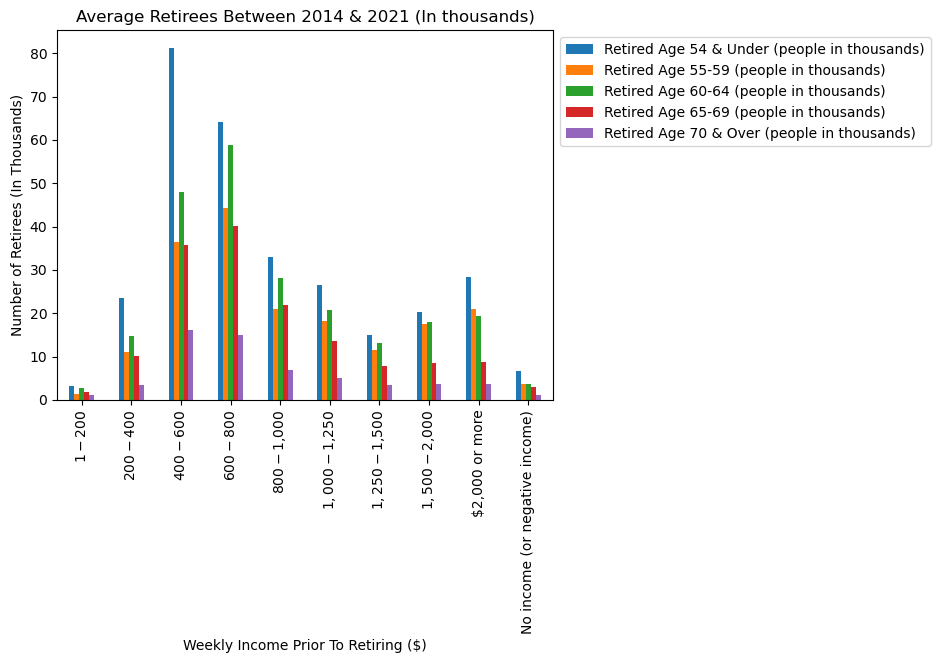

In [185]:
ax = grouped_income.plot(kind='bar', title='Average Retirees Between 2014 & 2021 (In thousands)', x='Category', xlabel='Weekly Income Prior To Retiring ($)', ylabel='Number of Retirees (In Thousands)', rot=90)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))


plt.show()